# 1. GIẢI THUẬT 1: CÂY QUYẾT ĐỊNH VÀ RỪNG CÂY

## Bài tập thực hành 1
Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

### 1. Tải package.

In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier

### 2. Đọc dữ liệu

In [79]:
df = pd.read_csv('dataset/titanic/train.csv')

### 3. Làm sạch dữ liệu

In [80]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df = df.drop('Cabin', axis = 1)
df = df.drop('PassengerId', axis = 1)
df = df.drop('Ticket', axis = 1)
df = df.drop('Name', axis = 1)

In [81]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [82]:
X = df.drop('Survived', axis = 1);
y = df['Survived']

### 4. Chuẩn bị dữ liệu

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 

### 5. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [84]:
dt = tree.DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train, y_train) 

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 6. Hiển thị cây quyết định với package graphviz

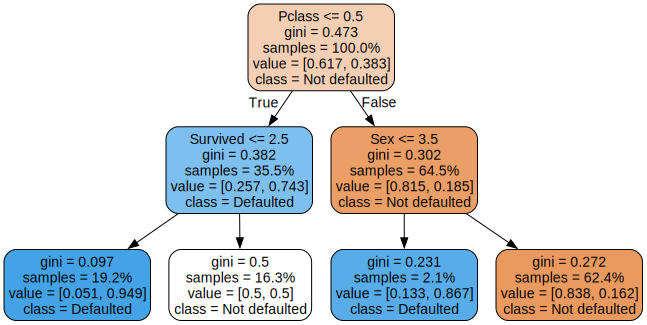

In [85]:
features_response = df.columns.tolist()
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=features_response[:-1], 
proportion=True, class_names=['Not defaulted', 'Defaulted']) 
graph = graphviz.Source(dot_data) 
graph

### 7. Xây dựng rừng cây (random forest)

In [86]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
bootstrap=True, oob_score=False, n_jobs=None, 
random_state=4, verbose=0, warm_start=False, class_weight=None) 

In [87]:
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

cv_rf_ex = GridSearchCV(
    rf, 
    param_grid=rf_params_ex, 
    scoring='roc_auc', 
    n_jobs=-1, 
    refit=True, 
    cv=4
)

cv_rf_ex.fit(X_train, y_train)

,estimator,RandomForestC...andom_state=4)
,param_grid,"{'n_estimators': [10, 20, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,70


### 8. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

<>:12: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:12: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14312\2292711702.py:12: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


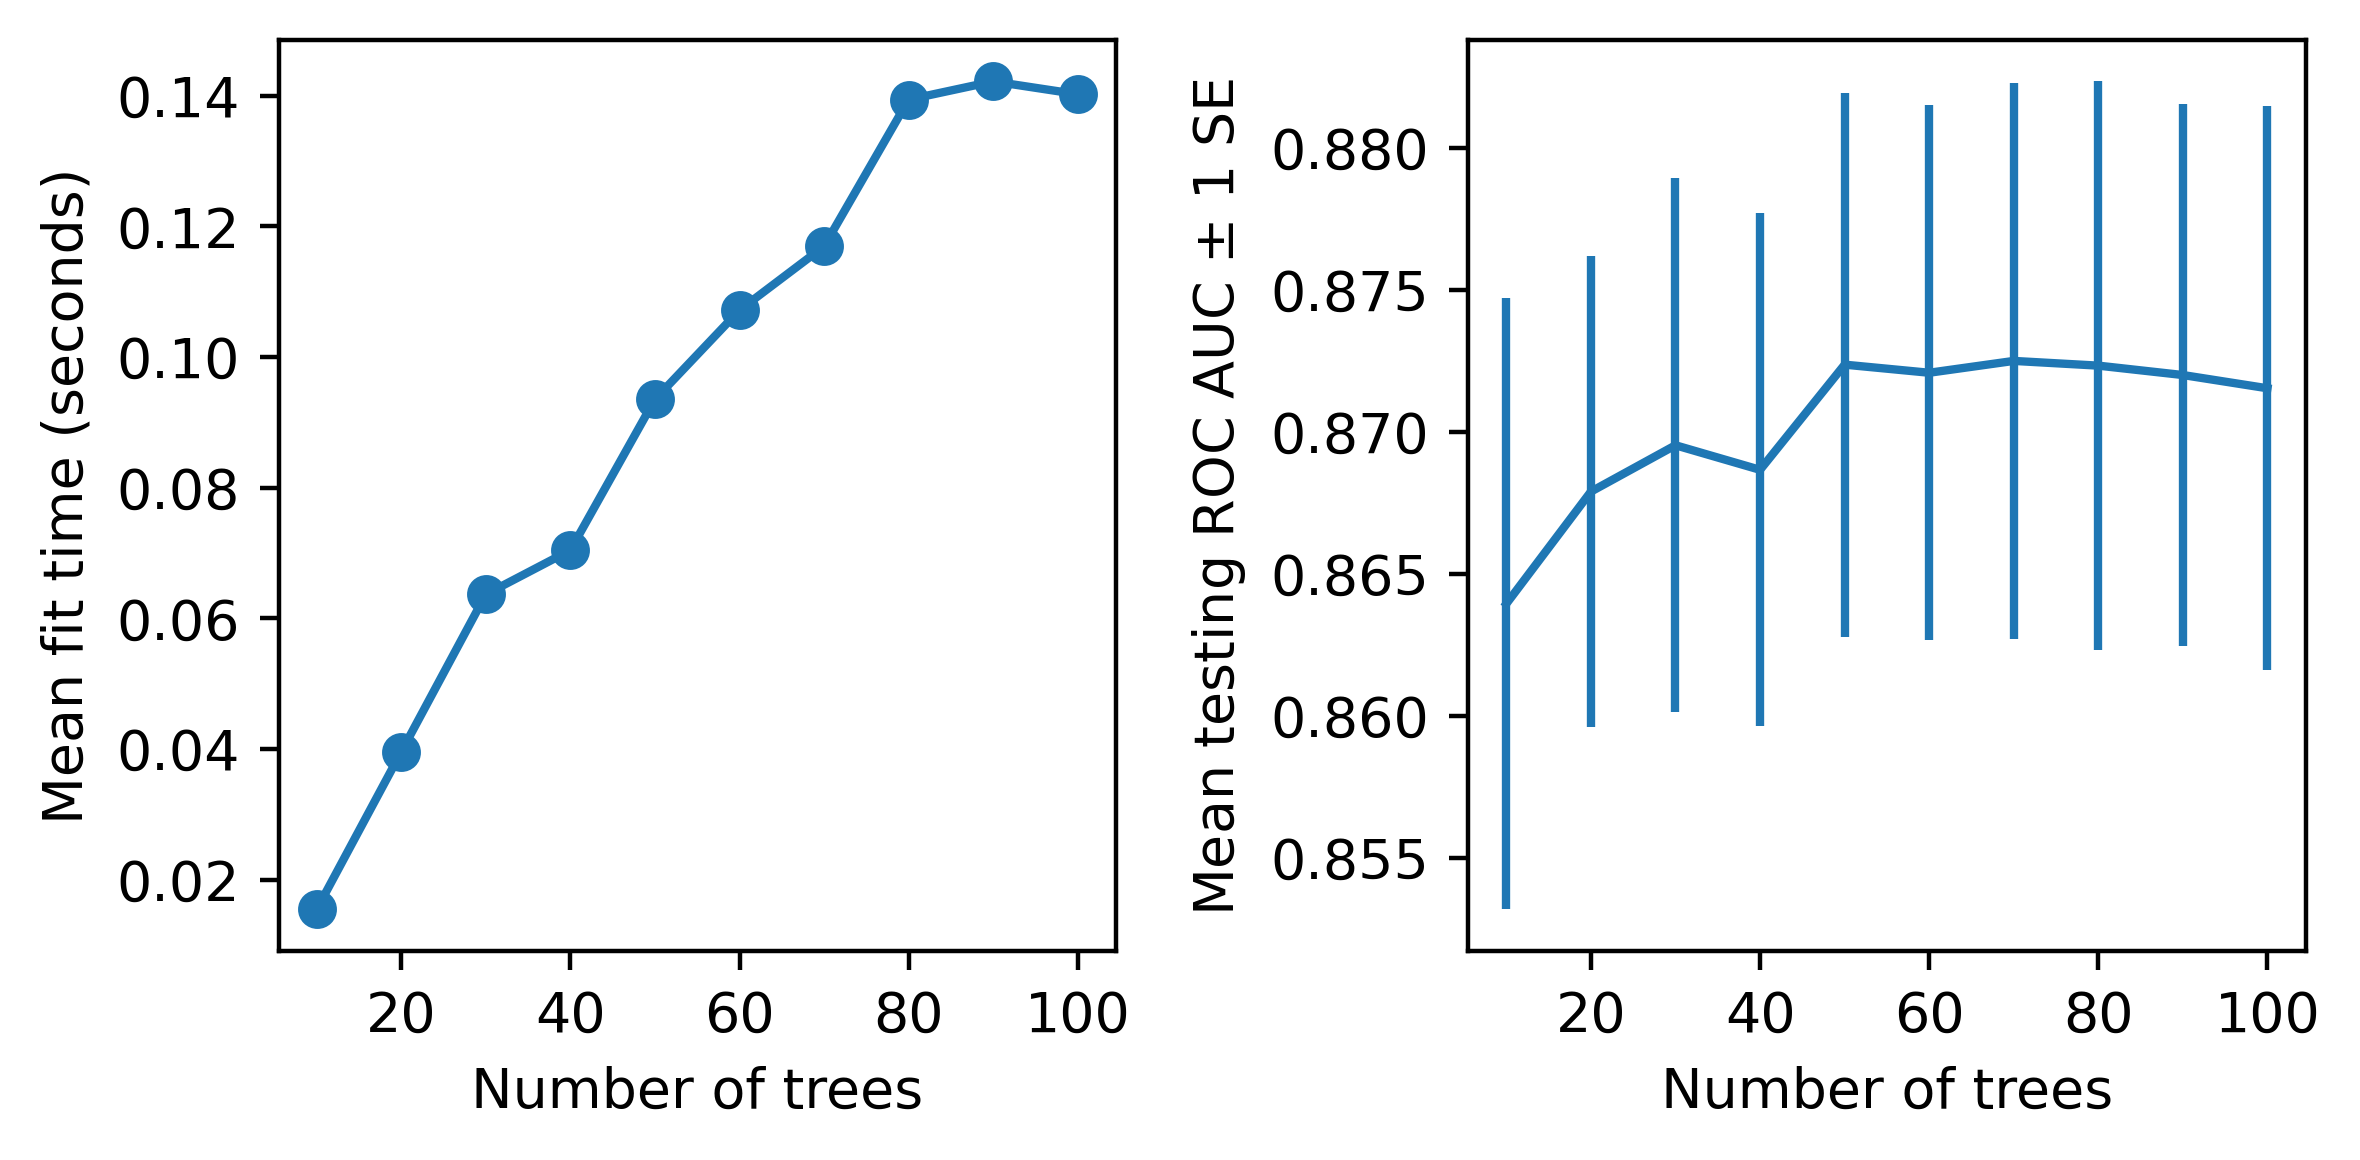

In [88]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3)) 
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'], 
cv_rf_ex_results_df['mean_fit_time'], 
'-o') 
axs[0].set_xlabel('Number of trees') 
axs[0].set_ylabel('Mean fit time (seconds)') 
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'], 
cv_rf_ex_results_df['mean_test_score'], 
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4)) 
axs[1].set_xlabel('Number of trees') 
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ') 
plt.tight_layout() 

### 9. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

<Axes: >

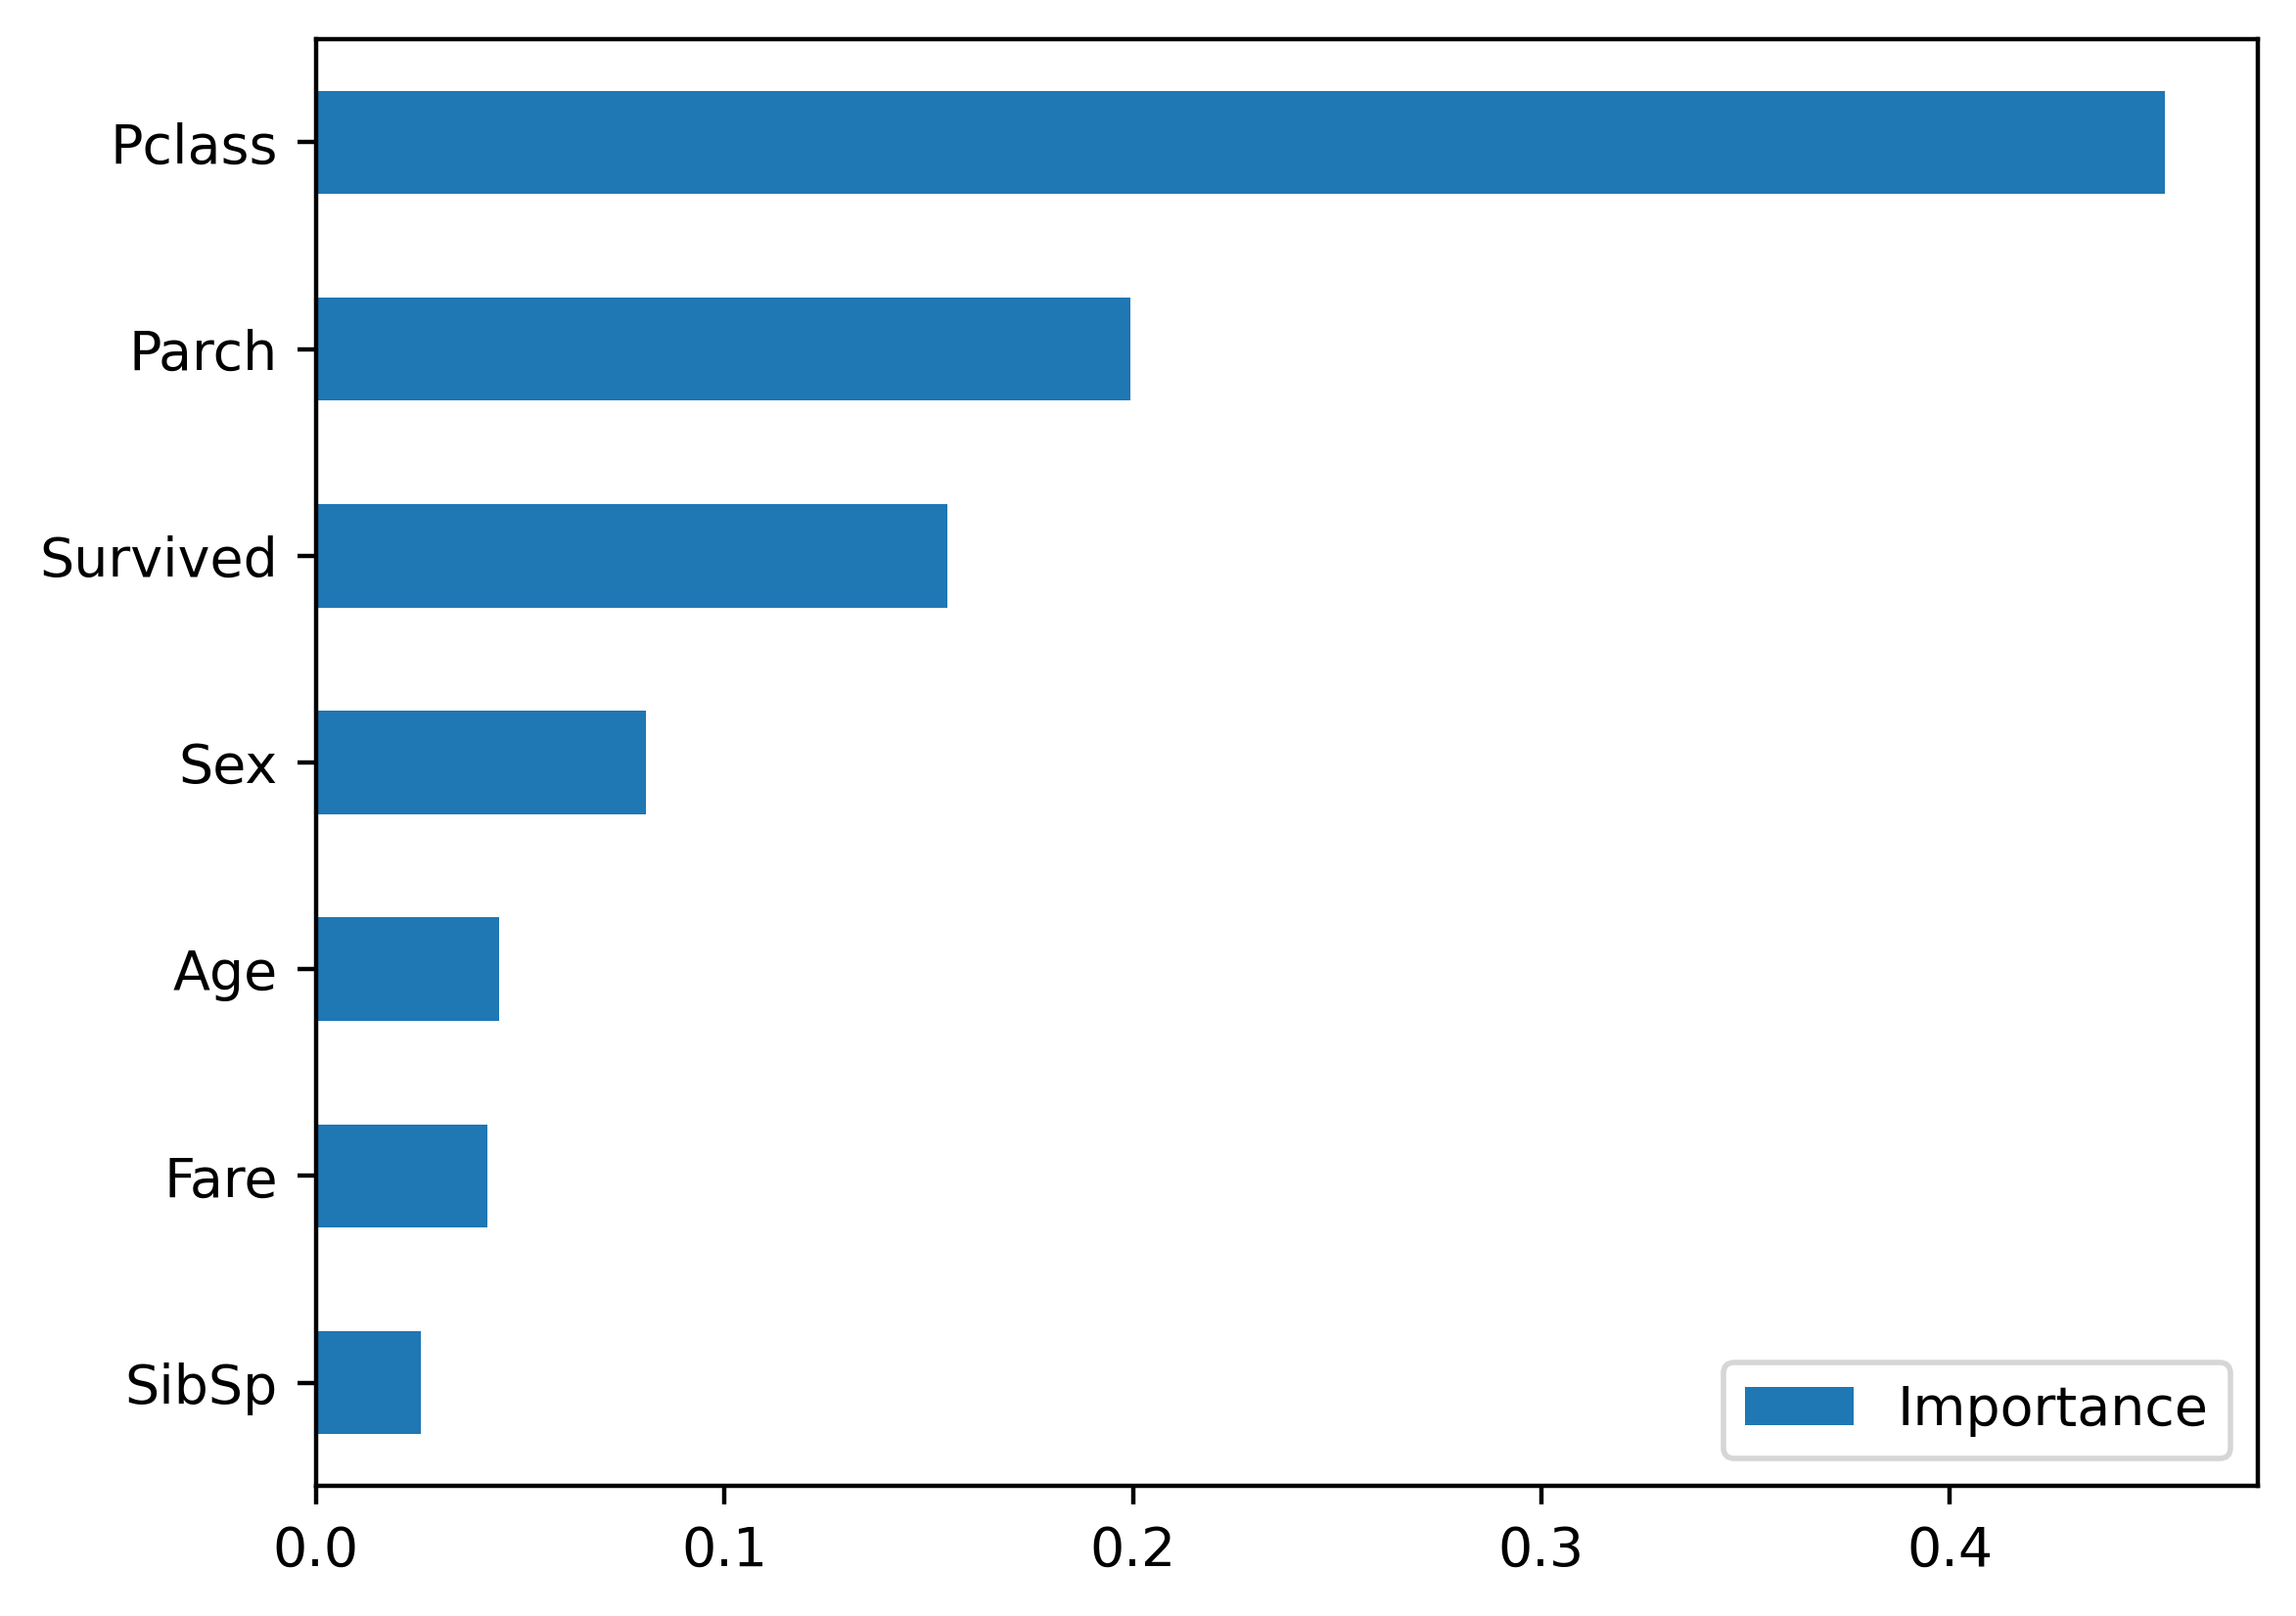

In [89]:
cv_rf_ex.best_params_ 
feat_imp_df = pd.DataFrame({ 
'Importance':cv_rf_ex.best_estimator_.feature_importances_}, 
index=features_response[:-1]) 
feat_imp_df.sort_values('Importance', ascending=True).plot.barh() 

##  Bài tập thực hành 2 
Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường. Dữ liệu lấy từ https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp 

### 1. Đọc dữ liệu

In [90]:
train = pd.read_csv('dataset/diabetes/diabetes_prediction_dataset.csv');
train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### 2. Làm sạch dữ liệu

In [91]:
train = train.drop_duplicates()

In [92]:
print(train.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [93]:
train = train[train['gender'] != 'Other']

In [94]:
train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [95]:
le = LabelEncoder()
train['gender'] = le.fit_transform(train['gender'])
train['smoking_history'] = le.fit_transform(train['smoking_history'])

### 3. Chuẩn bị dữ liệu

In [96]:
X = train.drop('diabetes', axis = 1);
y = train['diabetes']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### 4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [98]:
dt = tree.DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train, y_train) 

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 5. Hiển thị cây quyết định với package graphviz

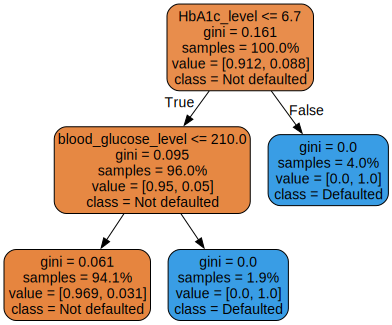

In [100]:
features_response = train.columns.tolist()
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=features_response[:-1], 
proportion=True, class_names=['Not defaulted', 'Defaulted']) 
graph = graphviz.Source(dot_data) 
graph

### 6. Xây dựng rừng cây (random forest)

In [101]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
bootstrap=True, oob_score=False, n_jobs=None, 
random_state=4, verbose=0, warm_start=False, class_weight=None) 

In [102]:
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

cv_rf_ex = GridSearchCV(
    rf, 
    param_grid=rf_params_ex, 
    scoring='roc_auc', 
    n_jobs=-1, 
    refit=True, 
    cv=4
)

cv_rf_ex.fit(X_train, y_train)

,estimator,RandomForestC...andom_state=4)
,param_grid,"{'n_estimators': [10, 20, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


### 7. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

<>:12: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:12: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14312\2292711702.py:12: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


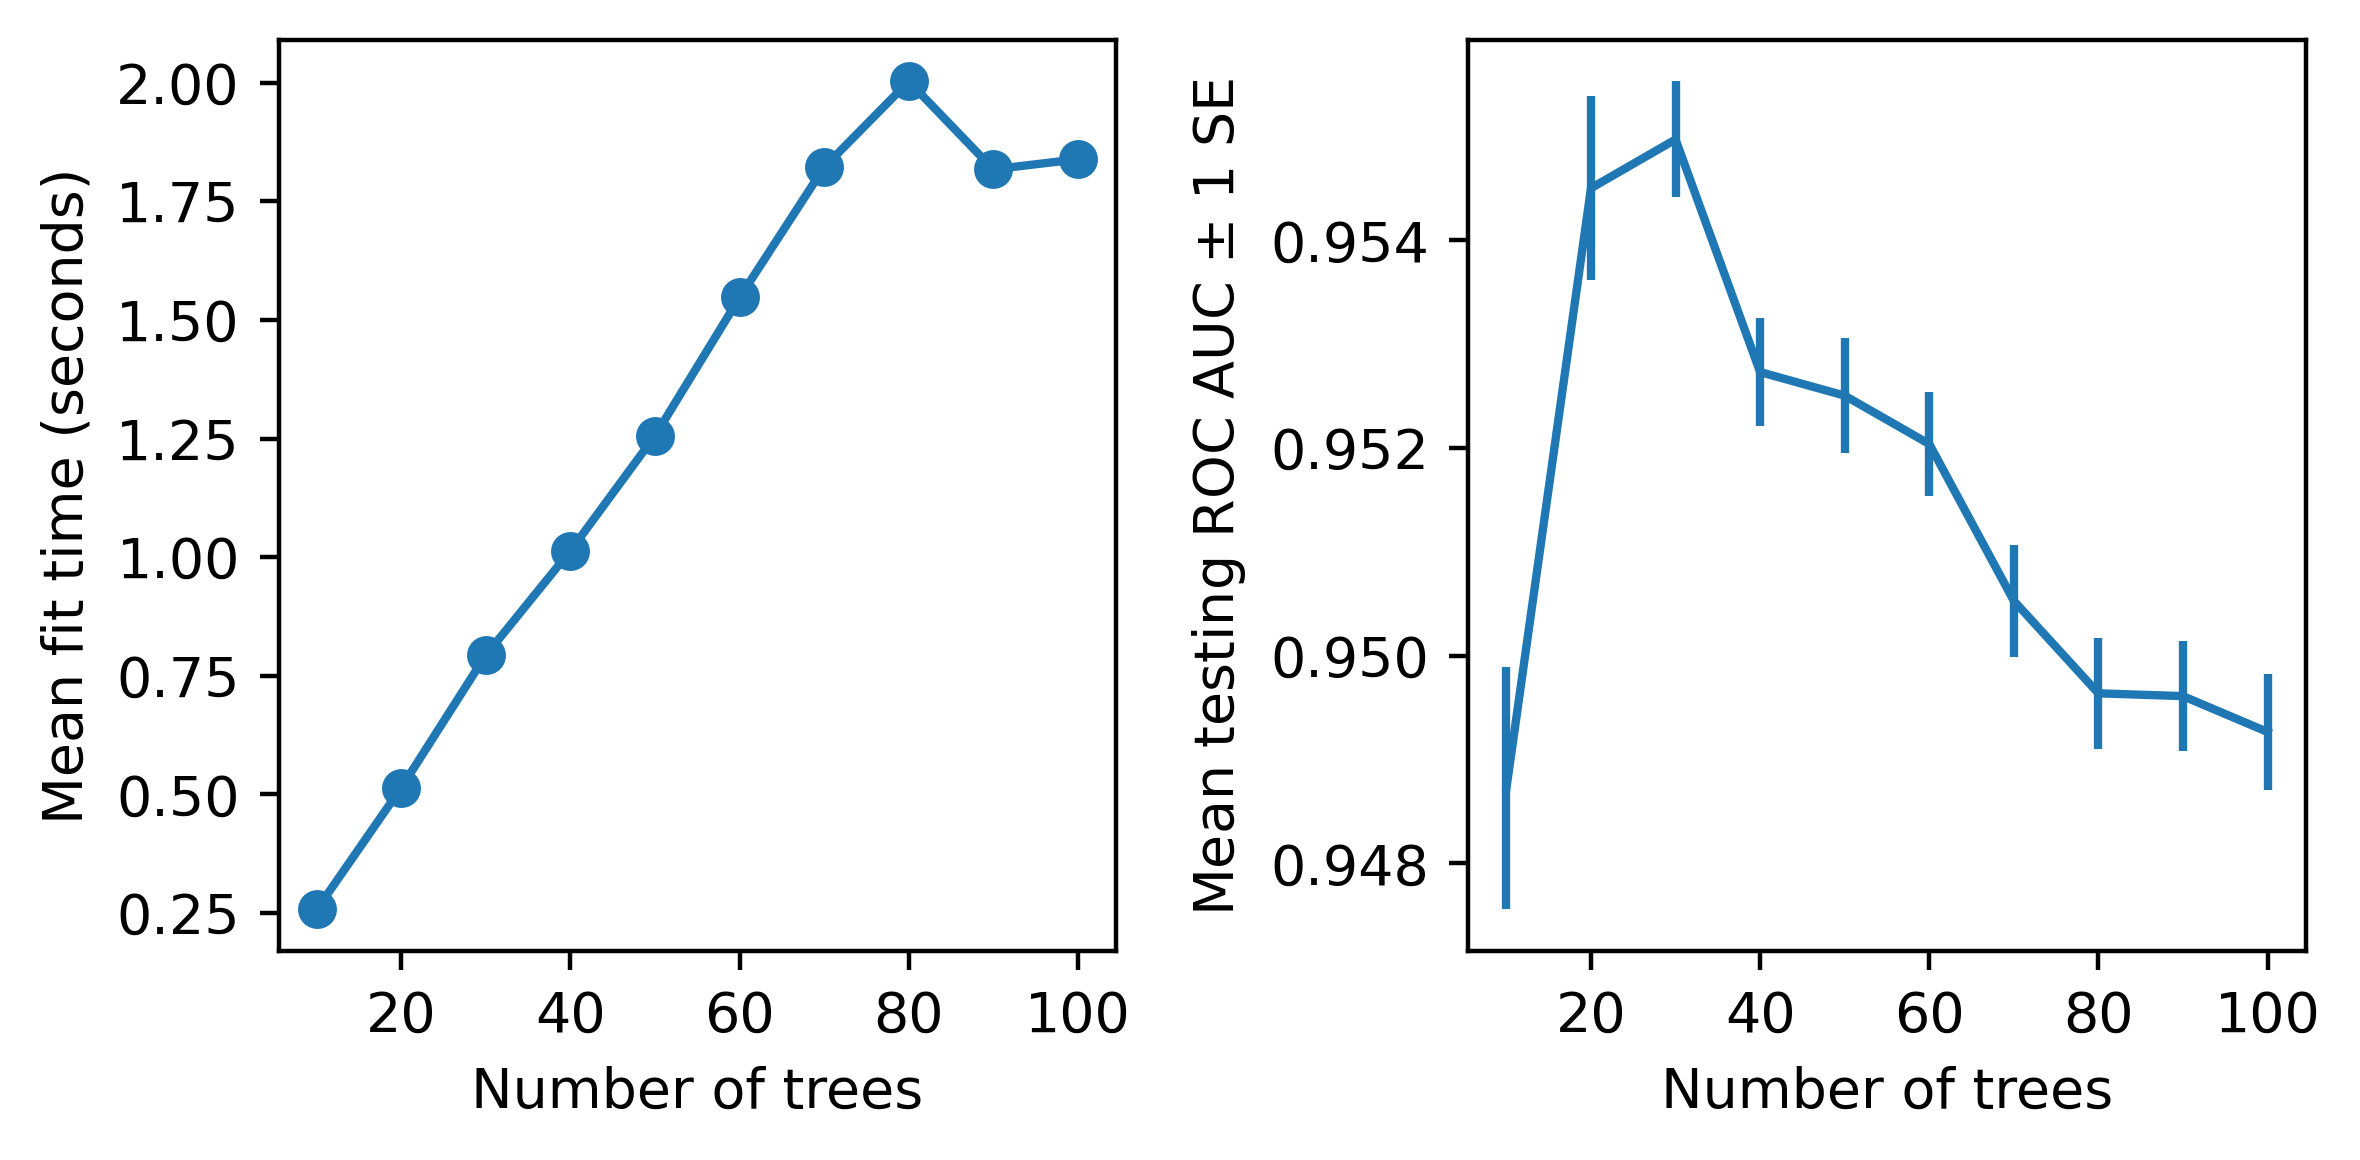

In [103]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3)) 
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'], 
cv_rf_ex_results_df['mean_fit_time'], 
'-o') 
axs[0].set_xlabel('Number of trees') 
axs[0].set_ylabel('Mean fit time (seconds)') 
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'], 
cv_rf_ex_results_df['mean_test_score'], 
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4)) 
axs[1].set_xlabel('Number of trees') 
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ') 
plt.tight_layout() 